In [8]:
%matplotlib inline

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style 
import mplfinance as mpf
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import pickle

querying data using pands_dataReader and using yahoo finance api

In [4]:
style.use('ggplot')
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 21)

df = web.DataReader('MMM', 'yahoo',start, end)

In [6]:
# df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
#df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,48.25000,47.03125,48.03125,47.1875,2173400.0,27.815882
2000-01-04,47.40625,45.31250,46.43750,45.3125,2713800.0,26.710594
2000-01-05,48.12500,45.56250,45.56250,46.6250,3699400.0,27.484299
2000-01-06,51.25000,47.15625,47.15625,50.3750,5975800.0,29.694832
2000-01-07,51.90625,49.96875,50.56250,51.3750,4101200.0,30.284302


In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# ax1.plot(df.index, df['Adj Close'])
# ax1.plot(df.index, df['100ma'])
# ax2.bar(df.index, df['Volume'])

# plt.show()

In [23]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc['volume'] = df['Volume'].resample('10D').sum()

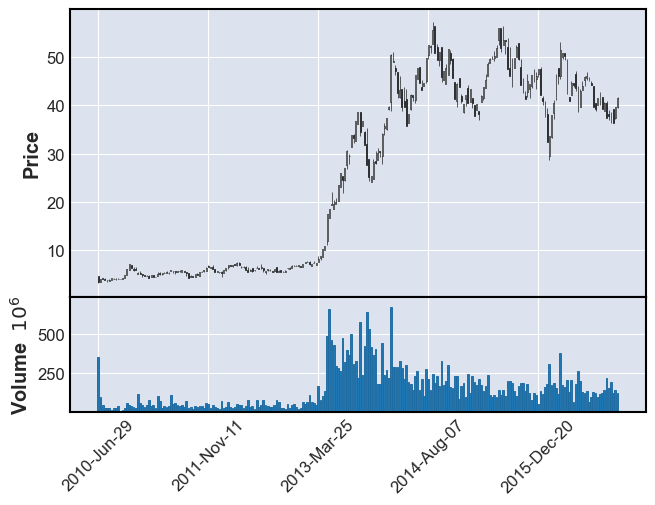

In [24]:
mpf.plot(df_ohlc, type='candle', volume=True, style='yahoo')